In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Normalizer,StandardScaler
from crossgbm import run_gbm
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from outlier import outlier_detection,multi_outlier
from missing_value import missingValue_Treat
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report,roc_auc_score

from xgboost import XGBClassifier as xgbc
from lightgbm import LGBMClassifier
import lightgbm as lgb
import h5py
import time

In [3]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',500)

In [14]:
train=pd.read_csv('XFtrain.csv')
test=pd.read_csv('XFTest.csv')

In [15]:
train.head()

,Gender,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Entrepreneur,Other,Salaried,Self_Employed,X1,X2,X3,X4,Mid-Age,Old,Young,Re_Entrepreneur_Sum,Re_Salaried_Sum,Re_Self_Employed_Sum,Re_Other_Sum,Re_Credit_Product_Sum,Re_Vintage_Avg,Re_Vintage_skew,Re_Channel_X1_Sum,Re_Channel_X2_Sum,Re_Channel_X3_Sum,Re_Channel_X4_Sum,Re_Mid_Age_Sum,Re_Young_Sum,Re_Old_Sum,Re_Active,Re_Balance_Avg,Re_Balance_skew,Re_Balance_std,Re_Balance_top,Re_Balance_bottom,Balance_to_Age,Vintage_to_Age
0,0,3.761200,0.0,1022.592783,0,0,0,1,0,0,0,0,1,0,0,1,0,692.0,6061.0,17773.0,11406.0,12470.0,3.866307,-0.476447,9638.0,11123.0,14467.0,704.0,14364.0,5924.0,15644.0,17821,1154.977979,1.153823,360.427893,30627.832551,3766.147157,398.224465,0.122059
1,0,3.465736,0.0,762.881380,0,0,0,0,1,0,1,0,0,0,0,0,1,70.0,4438.0,4912.0,3406.0,3227.0,3.517741,0.304761,6202.0,3219.0,3138.0,267.0,4498.0,4954.0,3374.0,4109,946.480357,1.494266,295.755137,28865.396775,3300.408466,339.832756,0.128654
2,0,3.258097,0.0,1218.324669,1,0,0,0,0,1,0,0,1,0,0,1,0,692.0,6061.0,17773.0,11406.0,12470.0,3.866307,-0.476447,9638.0,11123.0,14467.0,704.0,14364.0,5924.0,15644.0,17821,1154.977979,1.153823,360.427893,30627.832551,3766.147157,491.382051,0.109506
3,1,2.944439,0.0,685.896494,0,0,0,0,1,0,1,0,0,0,1,0,0,26.0,3591.0,2254.0,1849.0,1550.0,3.216390,1.048950,5437.0,1180.0,936.0,167.0,2283.0,4174.0,1263.0,1794,810.416360,1.404701,204.175050,20434.079953,3144.041560,298.859531,0.106913
4,0,3.496508,0.0,941.693687,0,0,0,0,1,0,1,0,0,0,0,0,1,42.0,2191.0,1998.0,1598.0,1362.0,3.508468,0.333497,3234.0,1458.0,1022.0,115.0,1836.0,2491.0,1502.0,1731,945.831598,0.733255,243.475797,22473.004417,3338.989139,419.486396,0.129796


In [16]:
type(train)

pandas.core.frame.DataFrame

In [17]:
target=train['Is_Lead'].astype(int)
train=train.drop('Is_Lead',axis=1)

In [23]:
features=train.columns.values

In [22]:
num_cols=[ 'Vintage','Avg_Account_Balance','Re_Entrepreneur_Sum', 'Re_Salaried_Sum', 'Re_Self_Employed_Sum',
       'Re_Other_Sum', 'Re_Credit_Product_Sum', 'Re_Vintage_Avg',
       'Re_Vintage_skew', 'Re_Channel_X1_Sum', 'Re_Channel_X2_Sum',
       'Re_Channel_X3_Sum', 'Re_Channel_X4_Sum', 'Re_Mid_Age_Sum',
       'Re_Young_Sum', 'Re_Old_Sum', 'Re_Active', 'Re_Balance_Avg',
       'Re_Balance_skew', 'Re_Balance_std', 'Re_Balance_top',
       'Re_Balance_bottom', 'Balance_to_Age', 'Vintage_to_Age']

In [9]:
run_gbm?

In [24]:
params={'random_state':100,'objective':'binary:logistic','n_estimators':2714,'booster':'gbtree','eta':.0215,'min_child_weight':20,'colsample_bytree':.75,'scale_pos_weight':2.25,'reg_lambda':17.789,'max_depth':5}

xclf=xgbc(**params)



fit_params={'eval_metric':['logloss'],'verbose':500}

xgb_oofs,xgb_pred=run_gbm(clf=xclf,train=train,target=target,test=test,features=features,num_features=num_cols,fit_params=fit_params,oversample=True)

------------------------------------Fold1------------------------------------
[0]	validation_0-logloss:0.68337	validation_1-logloss:0.68350	validation_2-logloss:0.68355
[500]	validation_0-logloss:0.36047	validation_1-logloss:0.36694	validation_2-logloss:0.36718
[1000]	validation_0-logloss:0.35228	validation_1-logloss:0.36144	validation_2-logloss:0.36155
[1500]	validation_0-logloss:0.34817	validation_1-logloss:0.35953	validation_2-logloss:0.35960
[2000]	validation_0-logloss:0.34482	validation_1-logloss:0.35835	validation_2-logloss:0.35848
[2500]	validation_0-logloss:0.34196	validation_1-logloss:0.35747	validation_2-logloss:0.35766
[2713]	validation_0-logloss:0.34076	validation_1-logloss:0.35715	validation_2-logloss:0.35729
ROC score for Fold 1 Validation :0.9165012333029087 
ROC score for Validation :0.8689084812595191 
ROC score for Test Holdout :0.9156071196717618 
------------------------------------Fold2------------------------------------
[0]	validation_0-logloss:0.68341	validation

[1500]	validation_0-logloss:0.34804	validation_1-logloss:0.35943	validation_2-logloss:0.35693
[2000]	validation_0-logloss:0.34484	validation_1-logloss:0.35840	validation_2-logloss:0.35595
[2500]	validation_0-logloss:0.34195	validation_1-logloss:0.35772	validation_2-logloss:0.35533
[2713]	validation_0-logloss:0.34088	validation_1-logloss:0.35753	validation_2-logloss:0.35509
ROC score for Fold 10 Validation :0.9158888661690276 
ROC score for Validation :0.8691513939816092 
ROC score for Test Holdout :0.9154096051120172 
ROC for OOFs0.8463240952350314


In [25]:
xgb_oofs=pd.DataFrame([xgb_oofs],index=['lgbm_oofs']).T
xgb_pred=pd.DataFrame([xgb_pred],index=['xgb_pred']).T
xgb_oofs.to_csv('xgb_oofs.csv',index=False)
xgb_pred.to_csv('xgb_pred.csv',index=False)

In [42]:
train_loss=xclf.evals_result_['validation_0']['logloss']
test_loss=xclf.evals_result_['validation_1']['logloss']
val_loss=xclf.evals_result_['validation_2']['logloss']

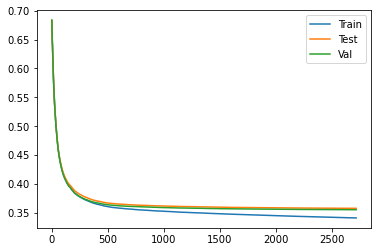

In [43]:
plt.plot(train_loss,label='Train')
plt.plot(test_loss,label='Test')
plt.plot(val_loss,label='Val')
plt.legend()

## LGBM

In [26]:
params={'n_estimators':4209,'objective':'binary','metric':['logloss'],'random_state':100,'learning_rate':.02,'min_child_samples':300,'max_bin':50,'colsample_bytree':.5,'max_depth':5,'num_leaves':127,'reg_lambda':22.54,'reg_alpha':10}
model=LGBMClassifier(**params)
fit_params={'eval_metric':['logloss'],'verbose':500}

lgbm_oofs,lgbm_pred=run_gbm(clf=model,train=train,target=target,test=test,features=features,num_features=num_cols,fit_params=fit_params,oversample=True)

------------------------------------Fold1------------------------------------
[500]	training's binary_logloss: 0.334198	valid_1's binary_logloss: 0.336767	valid_2's binary_logloss: 0.33926
[1000]	training's binary_logloss: 0.323413	valid_1's binary_logloss: 0.327445	valid_2's binary_logloss: 0.329979
[1500]	training's binary_logloss: 0.31943	valid_1's binary_logloss: 0.324943	valid_2's binary_logloss: 0.327209
[2000]	training's binary_logloss: 0.316865	valid_1's binary_logloss: 0.323624	valid_2's binary_logloss: 0.325553
[2500]	training's binary_logloss: 0.314728	valid_1's binary_logloss: 0.322753	valid_2's binary_logloss: 0.324333
[3000]	training's binary_logloss: 0.313197	valid_1's binary_logloss: 0.322226	valid_2's binary_logloss: 0.323658
[3500]	training's binary_logloss: 0.311869	valid_1's binary_logloss: 0.322016	valid_2's binary_logloss: 0.323199
[4000]	training's binary_logloss: 0.310784	valid_1's binary_logloss: 0.321865	valid_2's binary_logloss: 0.322863
ROC score for Fold 1 

[2000]	training's binary_logloss: 0.317553	valid_1's binary_logloss: 0.323605	valid_2's binary_logloss: 0.317252
[2500]	training's binary_logloss: 0.315486	valid_1's binary_logloss: 0.322803	valid_2's binary_logloss: 0.316208
[3000]	training's binary_logloss: 0.313984	valid_1's binary_logloss: 0.322358	valid_2's binary_logloss: 0.315658
[3500]	training's binary_logloss: 0.312683	valid_1's binary_logloss: 0.322097	valid_2's binary_logloss: 0.315265
[4000]	training's binary_logloss: 0.31158	valid_1's binary_logloss: 0.321964	valid_2's binary_logloss: 0.314993
ROC score for Fold 8 Validation :0.9196372451715683 
ROC score for Validation :0.8687682169710617 
ROC score for Test Holdout :0.9155451431973508 
------------------------------------Fold9------------------------------------
[500]	training's binary_logloss: 0.33478	valid_1's binary_logloss: 0.336804	valid_2's binary_logloss: 0.335026
[1000]	training's binary_logloss: 0.323842	valid_1's binary_logloss: 0.327318	valid_2's binary_loglo

In [27]:
lgbm_oofs=pd.DataFrame([lgbm_oofs],index=['lgbm_oofs']).T

In [28]:
lgbm_pred=pd.DataFrame([lgbm_pred],index=['lgbm_pred']).T

In [29]:
lgbm_oofs.to_csv('lgbm_oofs.csv',index=False)
lgbm_pred.to_csv('lgbm_pred.csv',index=False)

In [31]:
train_loss=model.evals_result_['training']['binary_logloss']
test_loss=model.evals_result_['valid_1']['binary_logloss']
val_loss=model.evals_result_['valid_2']['binary_logloss']

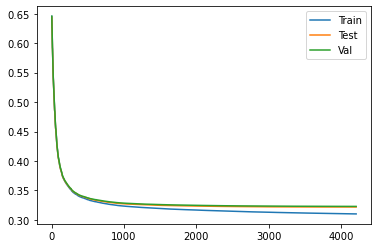

In [32]:
plt.plot(train_loss,label='Train')
plt.plot(test_loss,label='Test')
plt.plot(val_loss,label='Val')
plt.legend()

## Final Prediction

In [33]:
final_pred=(lgbm_pred['lgbm_pred']+xgb_pred['xgb_pred'])/2

In [38]:
len(final_pred)

105312

In [37]:
len(final_pred>.5)

105312